In [24]:
import yfinance as yf
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
gold_df = pd.read_csv('gold_prices_uk_6months.csv', parse_dates=['Date'], index_col='Date')
gold_df.head()

,Gold_USD,GBP_to_USD,Gold_GBP
Date,,,
2025-01-27,2737.500000,1.245935,2197.144760
2025-01-28,2766.800049,1.246059,2220.440112
2025-01-29,2769.100098,1.244168,2225.664060
2025-01-30,2823.000000,1.245530,2266.504788
2025-01-31,2812.500000,1.242390,2263.781186


### Basic Info

In [26]:
gold_df.shape

(125, 3)

In [27]:
gold_df.dtypes

Gold_USD      float64
GBP_to_USD    float64
Gold_GBP      float64
dtype: object

In [28]:
gold_df.isna().sum()

Gold_USD      0
GBP_to_USD    0
Gold_GBP      0
dtype: int64

In [29]:
gold_df.duplicated().sum()

np.int64(0)

### Visualization

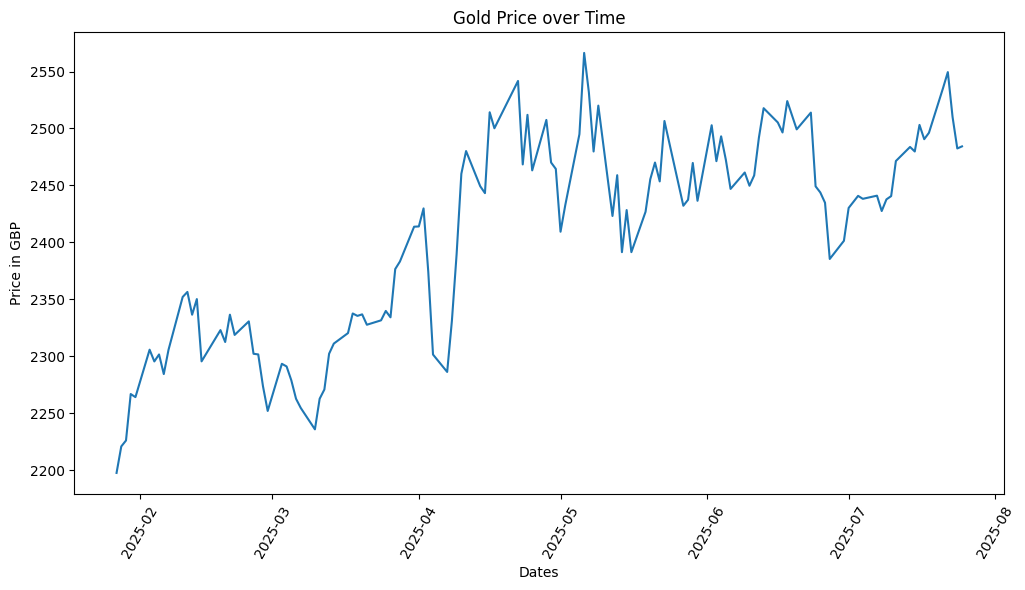

In [30]:
plt.figure(figsize=(12, 6))
sns.lineplot(gold_df, x='Date', y='Gold_GBP')
plt.title("Gold Price over Time")
plt.xticks(rotation=60)
plt.xlabel("Dates")
plt.ylabel("Price in GBP")
plt.show()


In [31]:
data = gold_df[['Gold_GBP']].values

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(data)

In [33]:
def create_sequences(data, seq_length=20):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [34]:
SEQ_LEN = 20
X, y = create_sequences(scaled_data, SEQ_LEN)

In [35]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU

In [37]:
def build_model(model_type, input_shape):
    model = Sequential()
    if model_type == 'RNN':
        model.add(SimpleRNN(50, return_sequences=False, input_shape=input_shape))
    elif model_type == 'LSTM':
        model.add(LSTM(50, return_sequences=False, input_shape=input_shape))
    elif model_type == 'GRU':
        model.add(GRU(50, return_sequences=False, input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model


In [38]:
def evaluate_model(model, X_test, y_test, name):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_true = scaler.inverse_transform(y_test)

    mae = mean_absolute_error(y_true, predictions)
    mse = mean_squared_error(y_true, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, predictions)

    print(f"\n{name} Evaluation:")
    print(f"MAE : {mae:.2f}")
    print(f"MSE : {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²  : {r2:.2f}")

    plt.figure(figsize=(10, 4))
    plt.plot(y_true, label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.title(f"{name} - Actual vs Predicted Gold Prices")
    plt.legend()
    plt.show()


e:\Free Lancing\UEL\Gold Price\genv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step

RNN Evaluation:
MAE : 21.41
MSE : 995.13
RMSE: 31.55
R²  : 0.41


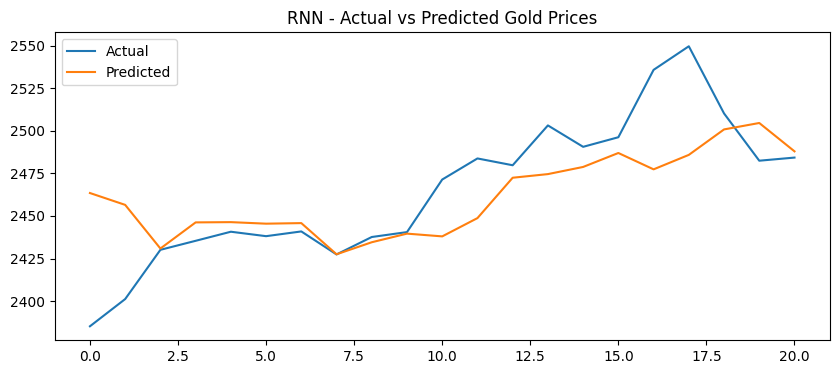

e:\Free Lancing\UEL\Gold Price\genv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step

LSTM Evaluation:
MAE : 28.54
MSE : 1393.13
RMSE: 37.32
R²  : 0.18


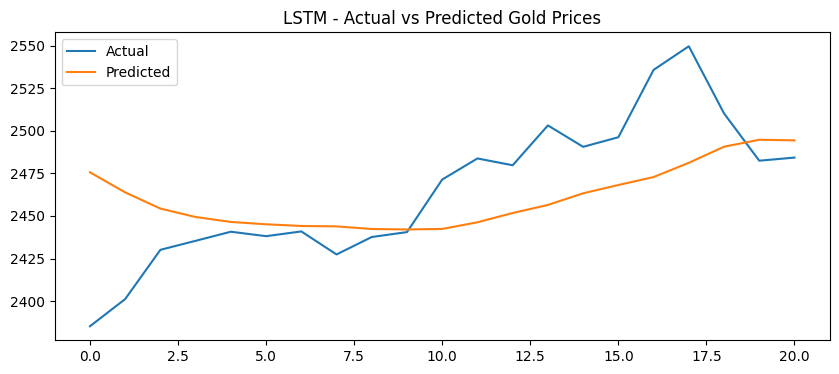

e:\Free Lancing\UEL\Gold Price\genv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step

GRU Evaluation:
MAE : 25.52
MSE : 1080.96
RMSE: 32.88
R²  : 0.36


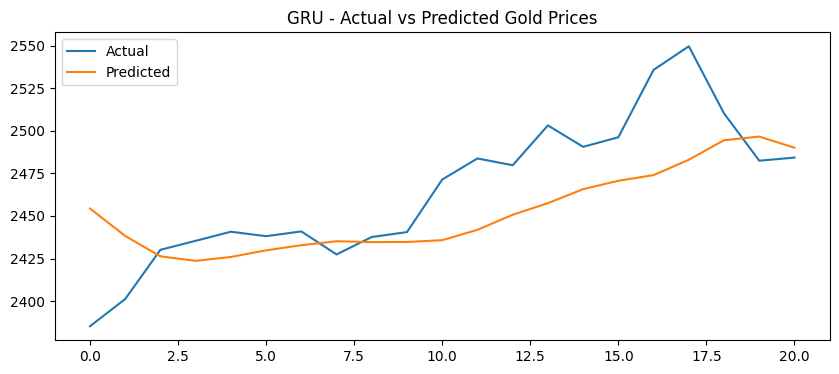

In [39]:
input_shape = (X_train.shape[1], X_train.shape[2])

# RNN
rnn_model = build_model('RNN', input_shape)
rnn_model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=0)
evaluate_model(rnn_model, X_test, y_test, "RNN")

# LSTM
lstm_model = build_model('LSTM', input_shape)
lstm_model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=0)
evaluate_model(lstm_model, X_test, y_test, "LSTM")

# GRU
gru_model = build_model('GRU', input_shape)
gru_model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=0)
evaluate_model(gru_model, X_test, y_test, "GRU")
